# Load the Dataset

In [10]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df=pd.read_csv('data/NiV_Data.csv')
df.set_index('Year')

,Population,Urban Population %,Density (P/Km²),Urban Population,Rural Population,Max T,Min T,Rainfall,Precipitation,Humidity,Dry-Bulb T,Infected,Death
Year,,,,,,,,,,,,,
2001,136578600,23,1049,32505706,104072893,33.24,18.28,139.92,2198.861157,73.42,25.94,13,9
2002,138612896,24,1065,33960159,104652737,33.44,17.68,156.25,2127.613884,73.17,25.82,0,0
2003,140647193,25,1080,35443092,105204100,33.52,18.08,141.08,2159.296860,73.67,25.75,12,8
2004,142681489,25,1096,36954505,105726983,33.55,18.02,195.58,2112.044628,72.67,25.88,67,50
2005,144715786,26,1112,38494399,106221386,33.67,18.73,219.75,2092.132562,72.83,26.24,12,11
2006,146213025,27,1123,40033126,106179898,34.62,18.65,159.92,2205.117025,71.42,26.47,0,0
2007,147710264,28,1134,41595210,106115053,33.90,18.29,240.42,2246.405950,73.17,25.71,18,9
2008,149207503,28,1146,43180651,106026851,33.67,18.34,184.75,2384.648926,73.42,25.88,11,7
2009,150704742,29,1157,44789449,105915292,34.66,18.68,160.92,2155.826777,70.25,26.52,4,1


In [2]:
prev = 100614628
next = 100651123

val = (next - prev) / next

print(f"{val * 100}")

0.036258909898104166


# Fig 1. Geographical Heatmap of Infected Cases in Bangladesh (2001 - 2024)

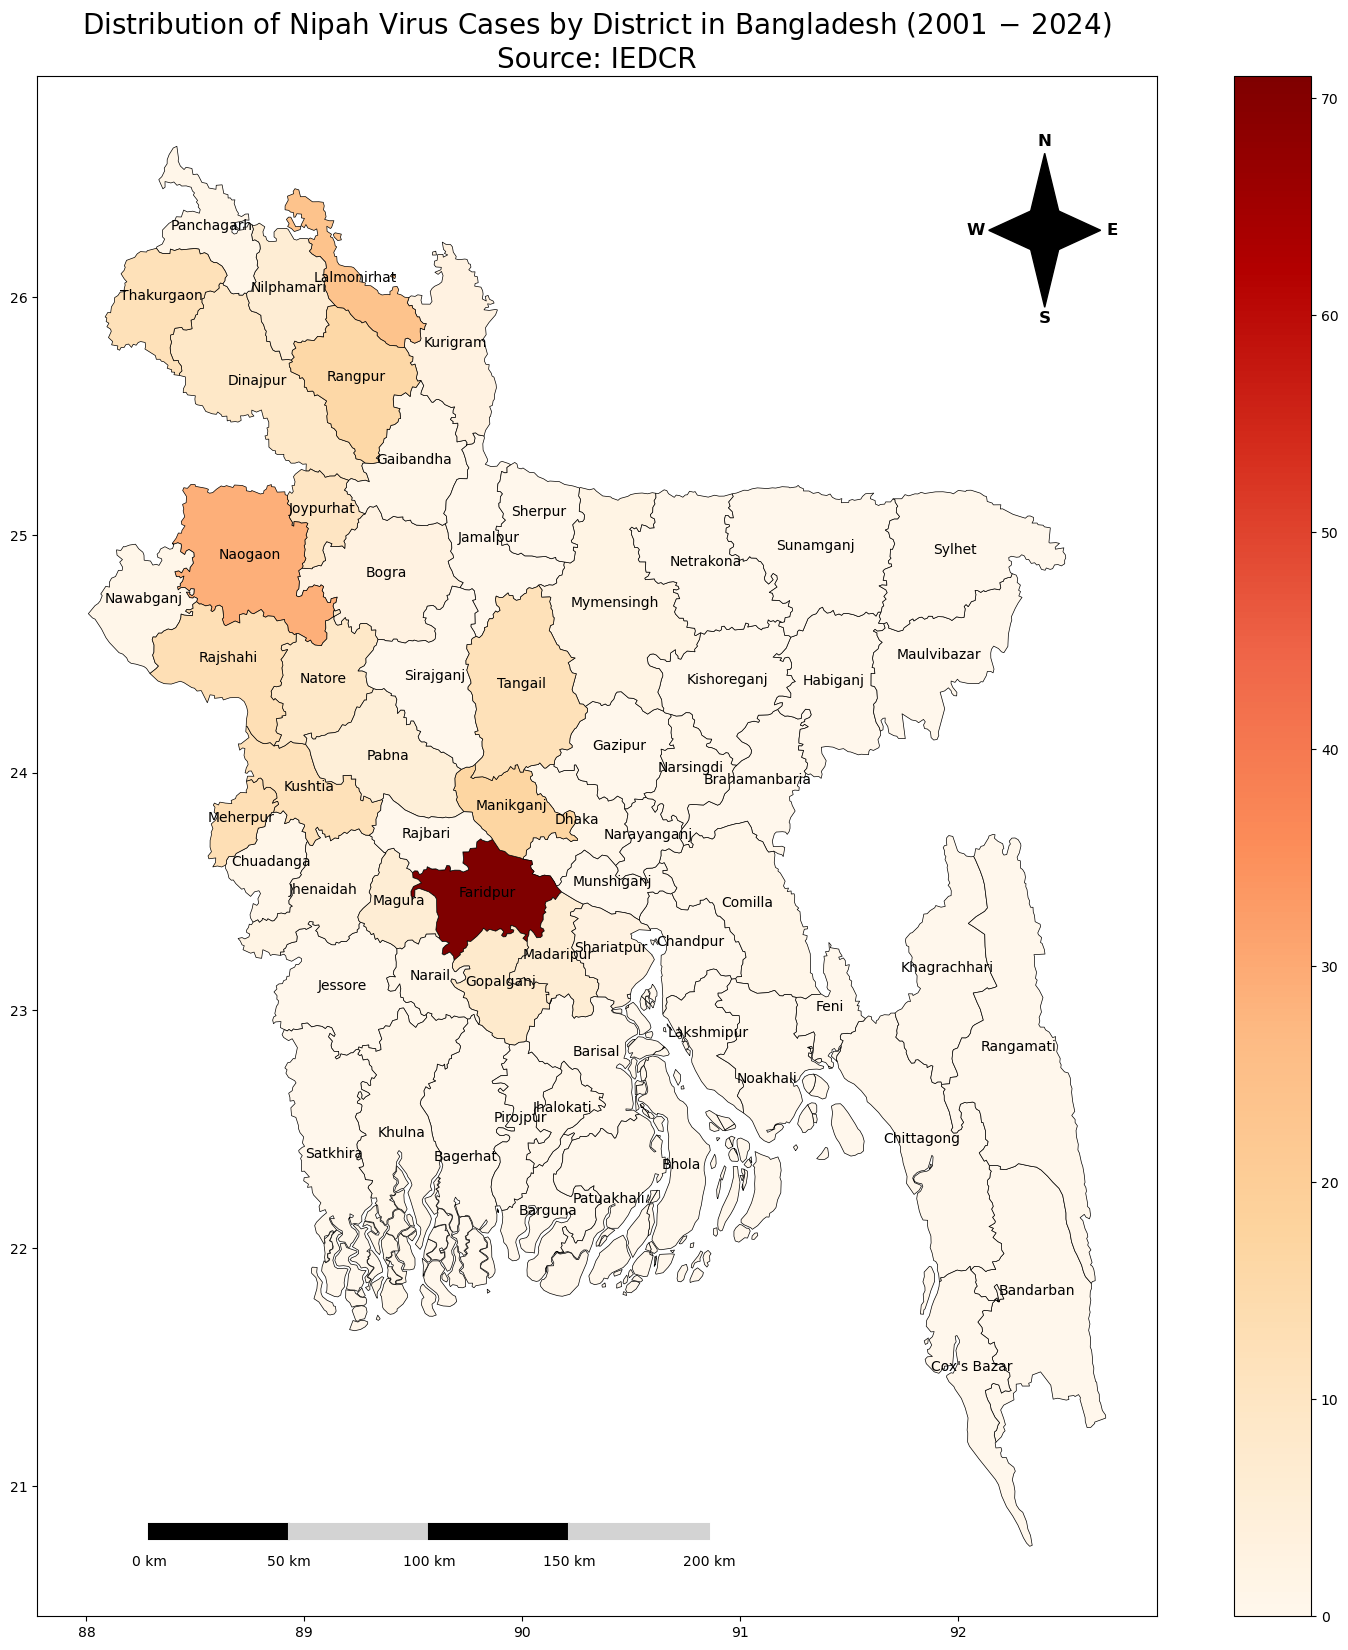

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow

# Load the GeoJSON file for districts
geojson_path = './geodata/small_bangladesh_geojson_adm2_64_districts_zillas.json'
districts_zillas = gpd.read_file(geojson_path)

# Provided districts and infection data
districts = [
    "Nawabganj", "Panchagarh", "Thakurgaon", "Nilphamari", "Dinajpur", "Lalmonirhat",
    "Kurigram", "Rangpur", "Gaibandha", "Joypurhat", "Naogaon", "Rajshahi", "Bogra",
    "Natore", "Mymensingh", "Tangail", "Meherpur", "Kushtia", "Pabna", "Manikganj",
    "Dhaka", "Chuadanga", "Jhenaidah", "Magura", "Faridpur", "Narsingdi", "Comilla",
    "Narail", "Gopalganj", "Madaripur", "Shariatpur", "Khulna", "Jhalokati"
]

infected = [
    1, 1, 12, 6, 9, 24, 3, 16, 1, 10, 29, 13, 3, 9, 2, 12, 13, 12, 5, 17, 1, 1, 2, 6, 71,
    1, 1, 1, 8, 6, 3, 1, 1
]

# Align infection data with districts in the GeoJSON
district_names = districts_zillas['ADM2_EN'].values
district_data = {k: v for k, v in zip(districts, infected)}
districts_zillas['Infected'] = districts_zillas['ADM2_EN'].map(district_data).fillna(0)

infected = []
for name in district_names:
    if name in districts:
        infected.append(district_data[name])
    else:
        infected.append(0)

districts_zillas['Infected'] = infected

# Plot the updated map
fig, ax = plt.subplots(figsize=(20, 20))
ax = districts_zillas.plot(ax=ax, edgecolor='black', column='Infected', markersize=10, legend=True, cmap="OrRd", linewidth=0.5)

# Annotate districts with names
districts_zillas.apply(
    lambda x: ax.annotate(
        text=x['ADM2_EN'], xy=x.geometry.centroid.coords[0], ha='center',
    ),
    axis=1
)

# Add intersecting arrows for North, South, East, and West
arrow_length = 0.05  # Length of each arrow in axes coordinates
arrow_base_x, arrow_base_y = 0.9, 0.9  # Base of the arrows in axes coordinates

# North Arrow
ax.add_patch(FancyArrow(
    arrow_base_x, arrow_base_y, 0, arrow_length, color='black',
    width=0.01, length_includes_head=True, transform=ax.transAxes
))
ax.text(arrow_base_x, arrow_base_y + arrow_length + 0.005, 'N', ha='center', fontsize=12, transform=ax.transAxes, weight='bold')

# South Arrow
ax.add_patch(FancyArrow(
    arrow_base_x, arrow_base_y, 0, -arrow_length, color='black',
    width=0.01, length_includes_head=True, transform=ax.transAxes
))
ax.text(arrow_base_x, arrow_base_y - arrow_length - 0.01, 'S', ha='center', fontsize=12, transform=ax.transAxes, weight='bold')

# East Arrow
ax.add_patch(FancyArrow(
    arrow_base_x, arrow_base_y, arrow_length, 0, color='black',
    width=0.01, length_includes_head=True, transform=ax.transAxes
))
ax.text(arrow_base_x + arrow_length + 0.005, arrow_base_y, 'E', va='center', fontsize=12, transform=ax.transAxes, weight='bold')

# West Arrow
ax.add_patch(FancyArrow(
    arrow_base_x, arrow_base_y, -arrow_length, 0, color='black',
    width=0.01, length_includes_head=True, transform=ax.transAxes
))
ax.text(arrow_base_x - arrow_length - 0.02, arrow_base_y, 'W', va='center', fontsize=12, transform=ax.transAxes, weight='bold')

# Add Scale Bar right below the map, in km. Length of 0-200 km in 50 km intervals in black and white colors boxes.
scale_bar_x = 0.1  # Starting x position (axes coordinates)
scale_bar_y = 0.05  # Starting y position (axes coordinates)
scale_bar_length = 0.5  # Total length of the scale bar (axes fraction)
scale_bar_height = 0.01  # Height of the scale bar (axes fraction)
segment_length = scale_bar_length / 4  # Length of each segment (4 segments for 0-200 km)
scale_bar_colors = ['black', 'white']  # Alternating colors for the segments

# Create the scale bar with alternating colors
for i in range(4):  # 4 segments (0-50, 50-100, 100-150, 150-200)
    ax.add_patch(plt.Rectangle(
        (scale_bar_x + i * segment_length, scale_bar_y),  # Bottom-left corner of the segment
        segment_length, scale_bar_height,  # Width and height of the segment
        color='black' if i % 2 == 0 else 'lightgray',  # Alternate between black and gray
        transform=ax.transAxes,  # Use axes-relative coordinates
        edgecolor='black',  # Add a border to each segment
        linewidth=1.5
    ))

# Add labels below the scale bar
for i, label in enumerate(range(0, 201, 50)):  # Labels: 0, 50, 100, 150, 200
    ax.text(
        scale_bar_x + i * segment_length, scale_bar_y - 0.01,  # Position below each segment
        f'{label} km', ha='center', va='top', fontsize=10, transform=ax.transAxes
    )


# Add title and subtitle
ax.set_title("Distribution of Nipah Virus Cases by District in Bangladesh $(2001\,-\,2024)$\nSource: IEDCR",
             fontsize=20)

# Save the plot, as PNG for PDF
plt.savefig("imagesFinal/NiV_BD_heatmap_with_names.png", dpi=220, format="png", bbox_inches="tight")

# Save the plot, as EPS for LaTeX
plt.savefig("imagesFinal/NiV_BD_heatmap_with_names.eps", dpi=220, format="eps", bbox_inches="tight")

plt.show()


# Fig 2 NiV Infections, Deaths, and CFR in Bangladesh (2001 - 2024)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


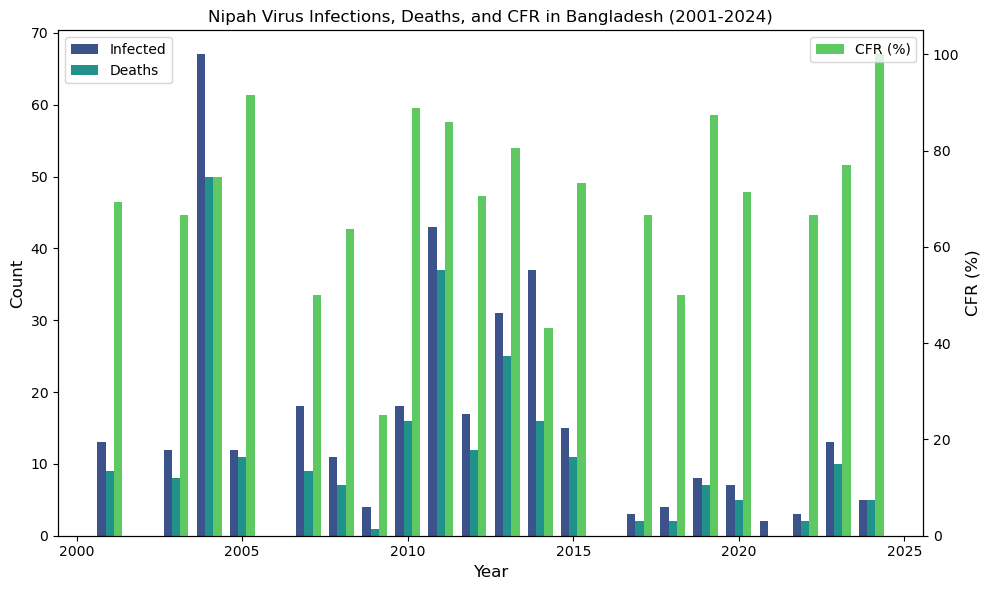

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the updated dataset
nipah_data_updated = pd.read_csv('data/NiV_Data.csv')

# Calculate the Case Fatality Rate (CFR) in percentage
nipah_data_updated['CFR (%)'] = (nipah_data_updated['Death'] / nipah_data_updated['Infected']) * 100

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define the width of the bars and the x-axis variable
width = 0.25
x = nipah_data_updated['Year']

# Define the color palette
colors = sns.color_palette('viridis', 3)

# Plot Infected and Death counts on the primary y-axis
ax1.bar(x - width, nipah_data_updated['Infected'], width=width, label='Infected', color=colors[0])
ax1.bar(x, nipah_data_updated['Death'], width=width, label='Deaths', color=colors[1])

# Set labels for the primary y-axis
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Nipah Virus Infections, Deaths, and CFR in Bangladesh (2001-2024)')

# Create a secondary y-axis for CFR
ax2 = ax1.twinx()

# Plot CFR as a bar plot on the secondary y-axis
ax2.bar(x + width, nipah_data_updated['CFR (%)'], width=width, label='CFR (%)', color=colors[2])

# Set labels for the secondary y-axis
ax2.set_ylabel('CFR (%)', fontsize=12)

# Add legends for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(False)
ax2.grid(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()

# Save the plot as PNG for PDF
plt.savefig('imagesFinal/nipah_infections_deaths_cfr.png', dpi=220, format='png', bbox_inches='tight')

# Save the plot as EPS for LaTeX
plt.savefig('imagesFinal/nipah_infections_deaths_cfr.eps', dpi=220, format='eps', bbox_inches='tight')

plt.show()

# Summary of the Dataset for different parameters

In [5]:
# Convert the appropriate columns to numeric types, if necessary
numeric_columns = ['Max T', 'Min T', 'Rainfall', 'Humidity', 'Dry-Bulb T', 'Infected', 'Death', 'Avg_Precipitation', 'Avg_Population', 'Avg_Urban', 'Avg_Rural']
existing_columns = [col for col in numeric_columns if col in df.columns]
df[existing_columns] = df[existing_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values, if any
data = df.dropna()

# Handle missing values by filling with the median
data = df.fillna(df.median())

# Drop the year column
data_summary = data.drop(columns=['Year']).describe(include='all').round(decimals=2)

# Display the stats
data_summary

,Population,Urban Population %,Density (P/Km²),Urban Population,Rural Population,Max T,Min T,Rainfall,Precipitation,Humidity,Dry-Bulb T,Infected,Death
count,2.400000e+01,24.00,24.00,24.00,2.400000e+01,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,1.554893e+08,32.29,1194.21,51505153.21,1.039841e+08,34.24,19.12,170.21,2201.93,71.90,26.51,14.29,10.21
std,1.075121e+07,5.83,82.57,12439755.89,1.983911e+06,1.07,1.66,55.53,106.51,2.23,1.05,15.97,12.12
min,1.365786e+08,23.00,1049.00,32505706.00,1.006146e+08,32.78,17.68,110.75,1971.07,64.00,25.71,0.00,0.00
25%,1.473360e+08,27.75,1131.25,41204689.00,1.024296e+08,33.63,18.38,137.36,2127.60,70.69,25.92,3.75,2.00
50%,1.557926e+08,32.50,1196.50,50791397.00,1.045594e+08,34.19,18.66,156.17,2192.67,72.54,26.24,11.50,7.50
75%,1.638778e+08,37.25,1258.75,61448221.00,1.057403e+08,34.63,19.16,187.46,2284.23,73.23,26.54,17.25,11.25
max,1.735624e+08,42.00,1333.00,72896192.00,1.062214e+08,38.33,26.11,350.00,2384.65,75.00,30.00,67.00,50.00


# Fig 3 Seasonal Decomposition of the Data

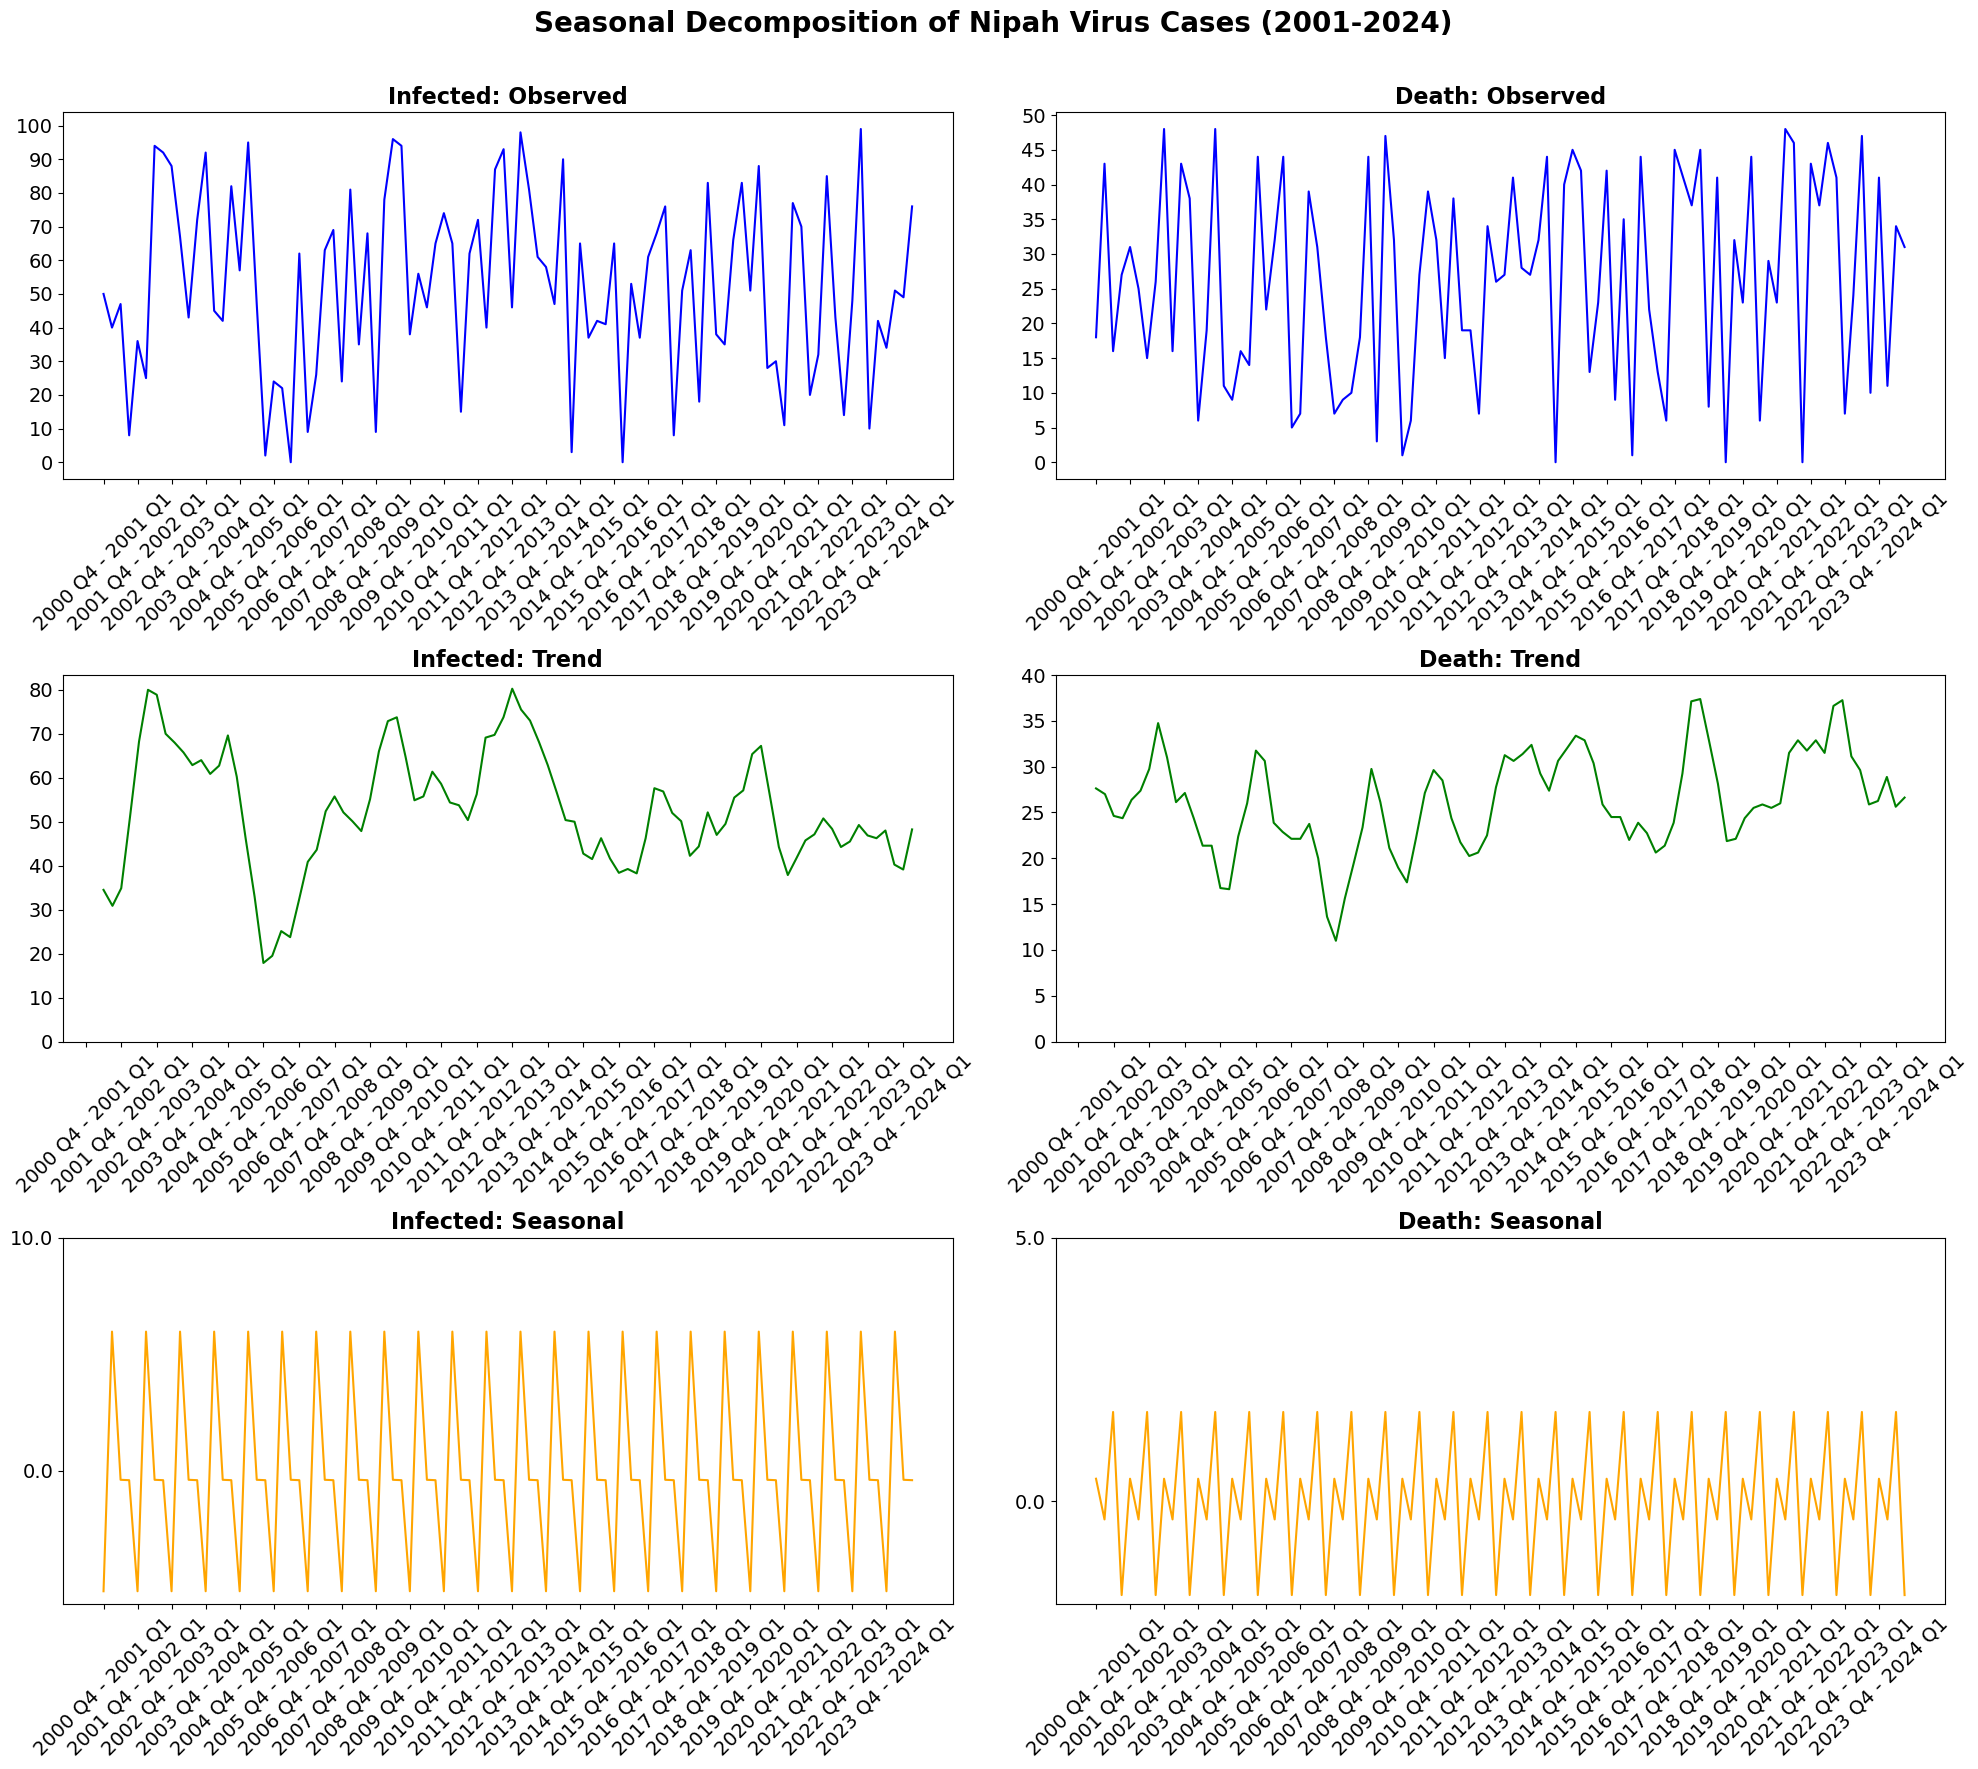

In [6]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np

# Example time series data for 'Infected' and 'Death' from 2001 to 2024
# Replace this with your actual data
date_range = pd.date_range(start="2001-01-01", end="2024-12-31", freq="Q")
df = pd.DataFrame({
    "Infected": np.random.randint(0, 100, len(date_range)),  # Replace with your data
    "Death": np.random.randint(0, 50, len(date_range))  # Replace with your data
}, index=date_range)

# Check for missing data
df = df.fillna(0)  # Replace missing values with 0

# Decompose the time series
decomposition_infected = seasonal_decompose(df["Infected"], model="additive", period=4)
decomposition_death = seasonal_decompose(df["Death"], model="additive", period=4)

# Generate custom quarter labels for x-axis
quarters = []
for year in range(2001, 2025):
    quarters.extend([f"{year-1} Q4 - {year} Q1", f"{year} Q2", f"{year} Q3", f"{year} Q4"])

# Select specific x-axis ticks for readability (e.g., every Q4-Q1 period)
tick_indices = [i * 4 for i in range(len(range(2001, 2025)))]  # Every Q4-Q1 label
tick_labels = [quarters[i] for i in tick_indices]

# Create a 3x2 grid for the plots
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# Plot Observed for Infected
axes[0, 0].plot(df.index, df["Infected"], label="Observed", color="blue")
axes[0, 0].set_title("Infected: Observed", fontsize=16, weight='bold')
axes[0, 0].set_xticks(df.index[tick_indices])
axes[0, 0].set_xticklabels(tick_labels, rotation=45, fontsize=14)
axes[0, 0].set_yticks(np.arange(0, df["Infected"].max() + 10, 10))
axes[0, 0].set_yticklabels(np.arange(0, df["Infected"].max() + 10, 10), fontsize=14)
# axes[0, 0].grid(True)

# Plot Observed for Death
axes[0, 1].plot(df.index, df["Death"], label="Observed", color="blue")
axes[0, 1].set_title("Death: Observed", fontsize=16, weight='bold')
axes[0, 1].set_xticks(df.index[tick_indices])
axes[0, 1].set_xticklabels(tick_labels, rotation=45, fontsize=14)
axes[0, 1].set_yticks(np.arange(0, df["Death"].max() + 5, 5))
axes[0, 1].set_yticklabels(np.arange(0, df["Death"].max() + 5, 5), fontsize=14)
# axes[0, 1].grid(True)

# Plot Trend for Infected
axes[1, 0].plot(df.index, decomposition_infected.trend, label="Trend", color="green")
axes[1, 0].set_title("Infected: Trend", fontsize=16, weight='bold')
axes[1, 0].set_xticks(df.index[tick_indices])
axes[1, 0].set_xticklabels(tick_labels, rotation=45, fontsize=14)
axes[1, 0].set_yticks(np.arange(0, int(decomposition_infected.trend.max()) + 10, 10))
axes[1, 0].set_yticklabels(np.arange(0, int(decomposition_infected.trend.max()) + 10, 10), fontsize=14)
# axes[1, 0].grid(True)

# Plot Trend for Death
axes[1, 1].plot(df.index, decomposition_death.trend, label="Trend", color="green")
axes[1, 1].set_title("Death: Trend", fontsize=16, weight='bold')
axes[1, 1].set_xticks(df.index[tick_indices])
axes[1, 1].set_xticklabels(tick_labels, rotation=45, fontsize=14)
axes[1, 1].set_yticks(np.arange(0, decomposition_death.trend.max() + 5, 5))
axes[1, 1].set_yticklabels(np.arange(0, int(decomposition_death.trend.max()) + 5, 5), fontsize=14)
# axes[1, 1].grid(True)

# Plot Seasonal for Infected
axes[2, 0].plot(df.index, decomposition_infected.seasonal, label="Seasonal", color="orange")
axes[2, 0].set_title("Infected: Seasonal", fontsize=16, weight='bold')
axes[2, 0].set_xticks(df.index[tick_indices])
axes[2, 0].set_xticklabels(tick_labels, rotation=45, fontsize=14)
axes[2, 0].set_yticks(np.arange(0, decomposition_infected.seasonal.max() + 10, 10))
axes[2, 0].set_yticklabels(np.arange(0, decomposition_infected.seasonal.max() + 10, 10), fontsize=14)
# axes[2, 0].grid(True)

# Plot Seasonal for Death
axes[2, 1].plot(df.index, decomposition_death.seasonal, label="Seasonal", color="orange")
axes[2, 1].set_title("Death: Seasonal", fontsize=16, weight='bold')
axes[2, 1].set_xticks(df.index[tick_indices])
axes[2, 1].set_xticklabels(tick_labels, rotation=45, fontsize=14)
axes[2, 1].set_yticks(np.arange(0, decomposition_death.seasonal.max() + 5, 5))
axes[2, 1].set_yticklabels(np.arange(0, decomposition_death.seasonal.max() + 5, 5), fontsize=14)
# axes[2, 1].grid(True)

# Add a common title
fig.suptitle("Seasonal Decomposition of Nipah Virus Cases (2001-2024)", fontsize=20, weight='bold')

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for the title

# Save the plot
plt.savefig('imagesFinal/nipah_seasonal_decomposition_3x2.png', dpi=220, format='png', bbox_inches='tight')

plt.show()

# Fig 4 Climatic Factor Trends in Bangladesh (2001 - 2024)

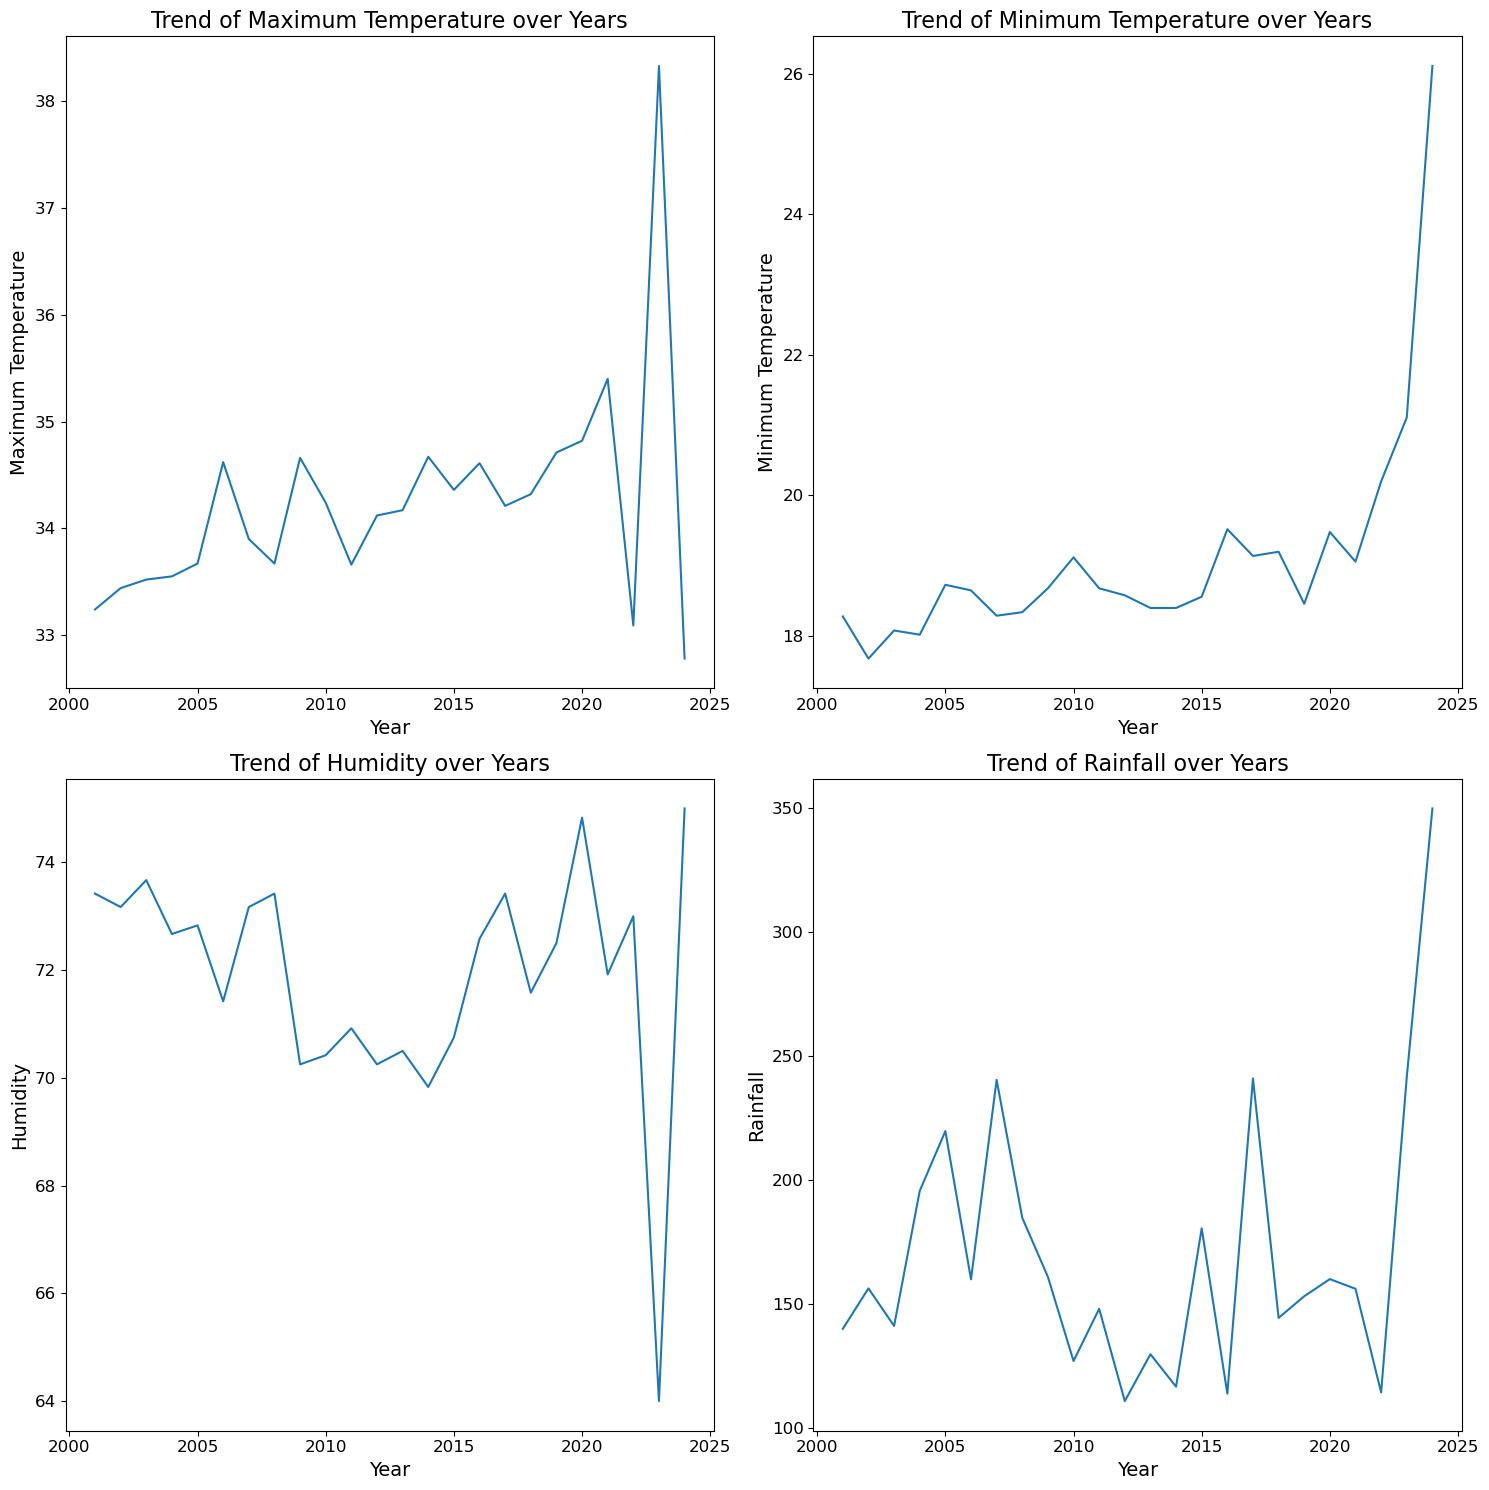

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Plot Max T trend
sns.lineplot(ax=axes[0, 0], x='Year', y='Max T', data=df)
axes[0, 0].set_title('Trend of Maximum Temperature over Years', fontsize=16)
axes[0, 0].set_xlabel('Year', fontsize=14)
axes[0, 0].set_ylabel('Maximum Temperature', fontsize=14)
axes[0, 0].tick_params(axis='both', which='major', labelsize=12)

# Plot Min T trend
sns.lineplot(ax=axes[0, 1], x='Year', y='Min T', data=df)
axes[0, 1].set_title('Trend of Minimum Temperature over Years', fontsize=16)
axes[0, 1].set_xlabel('Year', fontsize=14)
axes[0, 1].set_ylabel('Minimum Temperature', fontsize=14)
axes[0, 1].tick_params(axis='both', which='major', labelsize=12)

# Plot Humidity trend
sns.lineplot(ax=axes[1, 0], x='Year', y='Humidity', data=df)
axes[1, 0].set_title('Trend of Humidity over Years', fontsize=16)
axes[1, 0].set_xlabel('Year', fontsize=14)
axes[1, 0].set_ylabel('Humidity', fontsize=14)
axes[1, 0].tick_params(axis='both', which='major', labelsize=12)

# Plot Rainfall trend
sns.lineplot(ax=axes[1, 1], x='Year', y='Rainfall', data=df)
axes[1, 1].set_title('Trend of Rainfall over Years', fontsize=16)
axes[1, 1].set_xlabel('Year', fontsize=14)
axes[1, 1].set_ylabel('Rainfall', fontsize=14)
axes[1, 1].tick_params(axis='both', which='major', labelsize=12)

# Save the plot as PNG for PDF
plt.savefig('imagesFinal/climate_trends.png', dpi=220, format='png', bbox_inches='tight')

# Save the plot as EPS for LaTeX
plt.savefig('imagesFinal/climate_trends.eps', dpi=220, format='eps', bbox_inches='tight')

# Display the plots
plt.tight_layout()
plt.show()

# Normalized Explanatory Variables

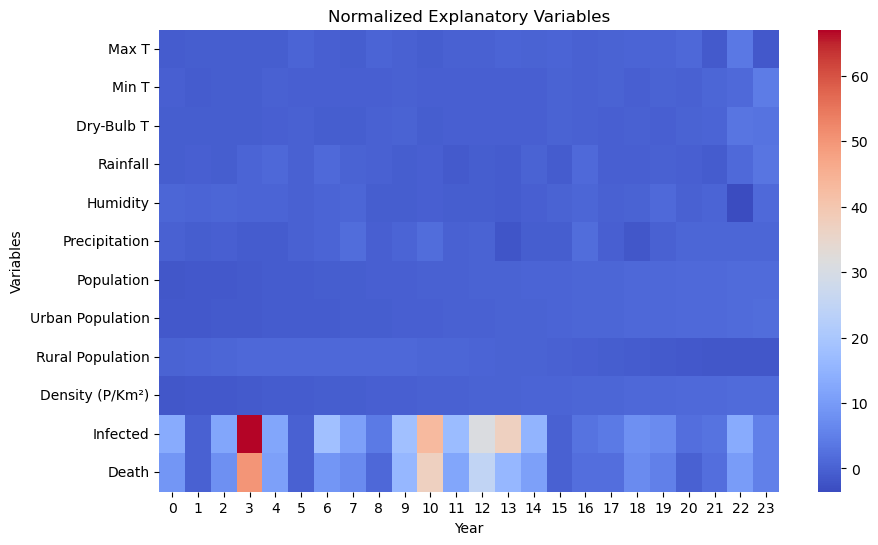

In [12]:
normalized_data = data[
    [
        "Max T",
        "Min T",
        "Dry-Bulb T",
        "Rainfall",
        "Humidity",
        "Precipitation",
        "Population",
        "Urban Population",
        "Rural Population",
        "Density (P/Km²)",
    ]
]
normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()

# Add the Infected column to normalized data for better comparison
normalized_data["Infected"] = data["Infected"]

# Add the Death column to normalized data for better comparison
normalized_data["Death"] = data["Death"]

# Display the normalized data
normalized_data.head().reset_index(drop=True)

# Plot the normalized explanatory variables without annotation numbers
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data.T, cmap="coolwarm", annot=False, cbar=True)
plt.title("Normalized Explanatory Variables")
plt.xlabel("Year")
plt.ylabel("Variables")

# Save the plot as PNG for PDF
plt.savefig('imagesFinal/normalized_explanatory_variables.png', dpi=220, format='png')

# Save the plot as EPS for LaTeX
plt.savefig('imagesFinal/normalized_explanatory_variables.eps', dpi=220, format="eps")

# Display the plot
plt.show()

# Fig 5 Parwise Correlation Plot of the Data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


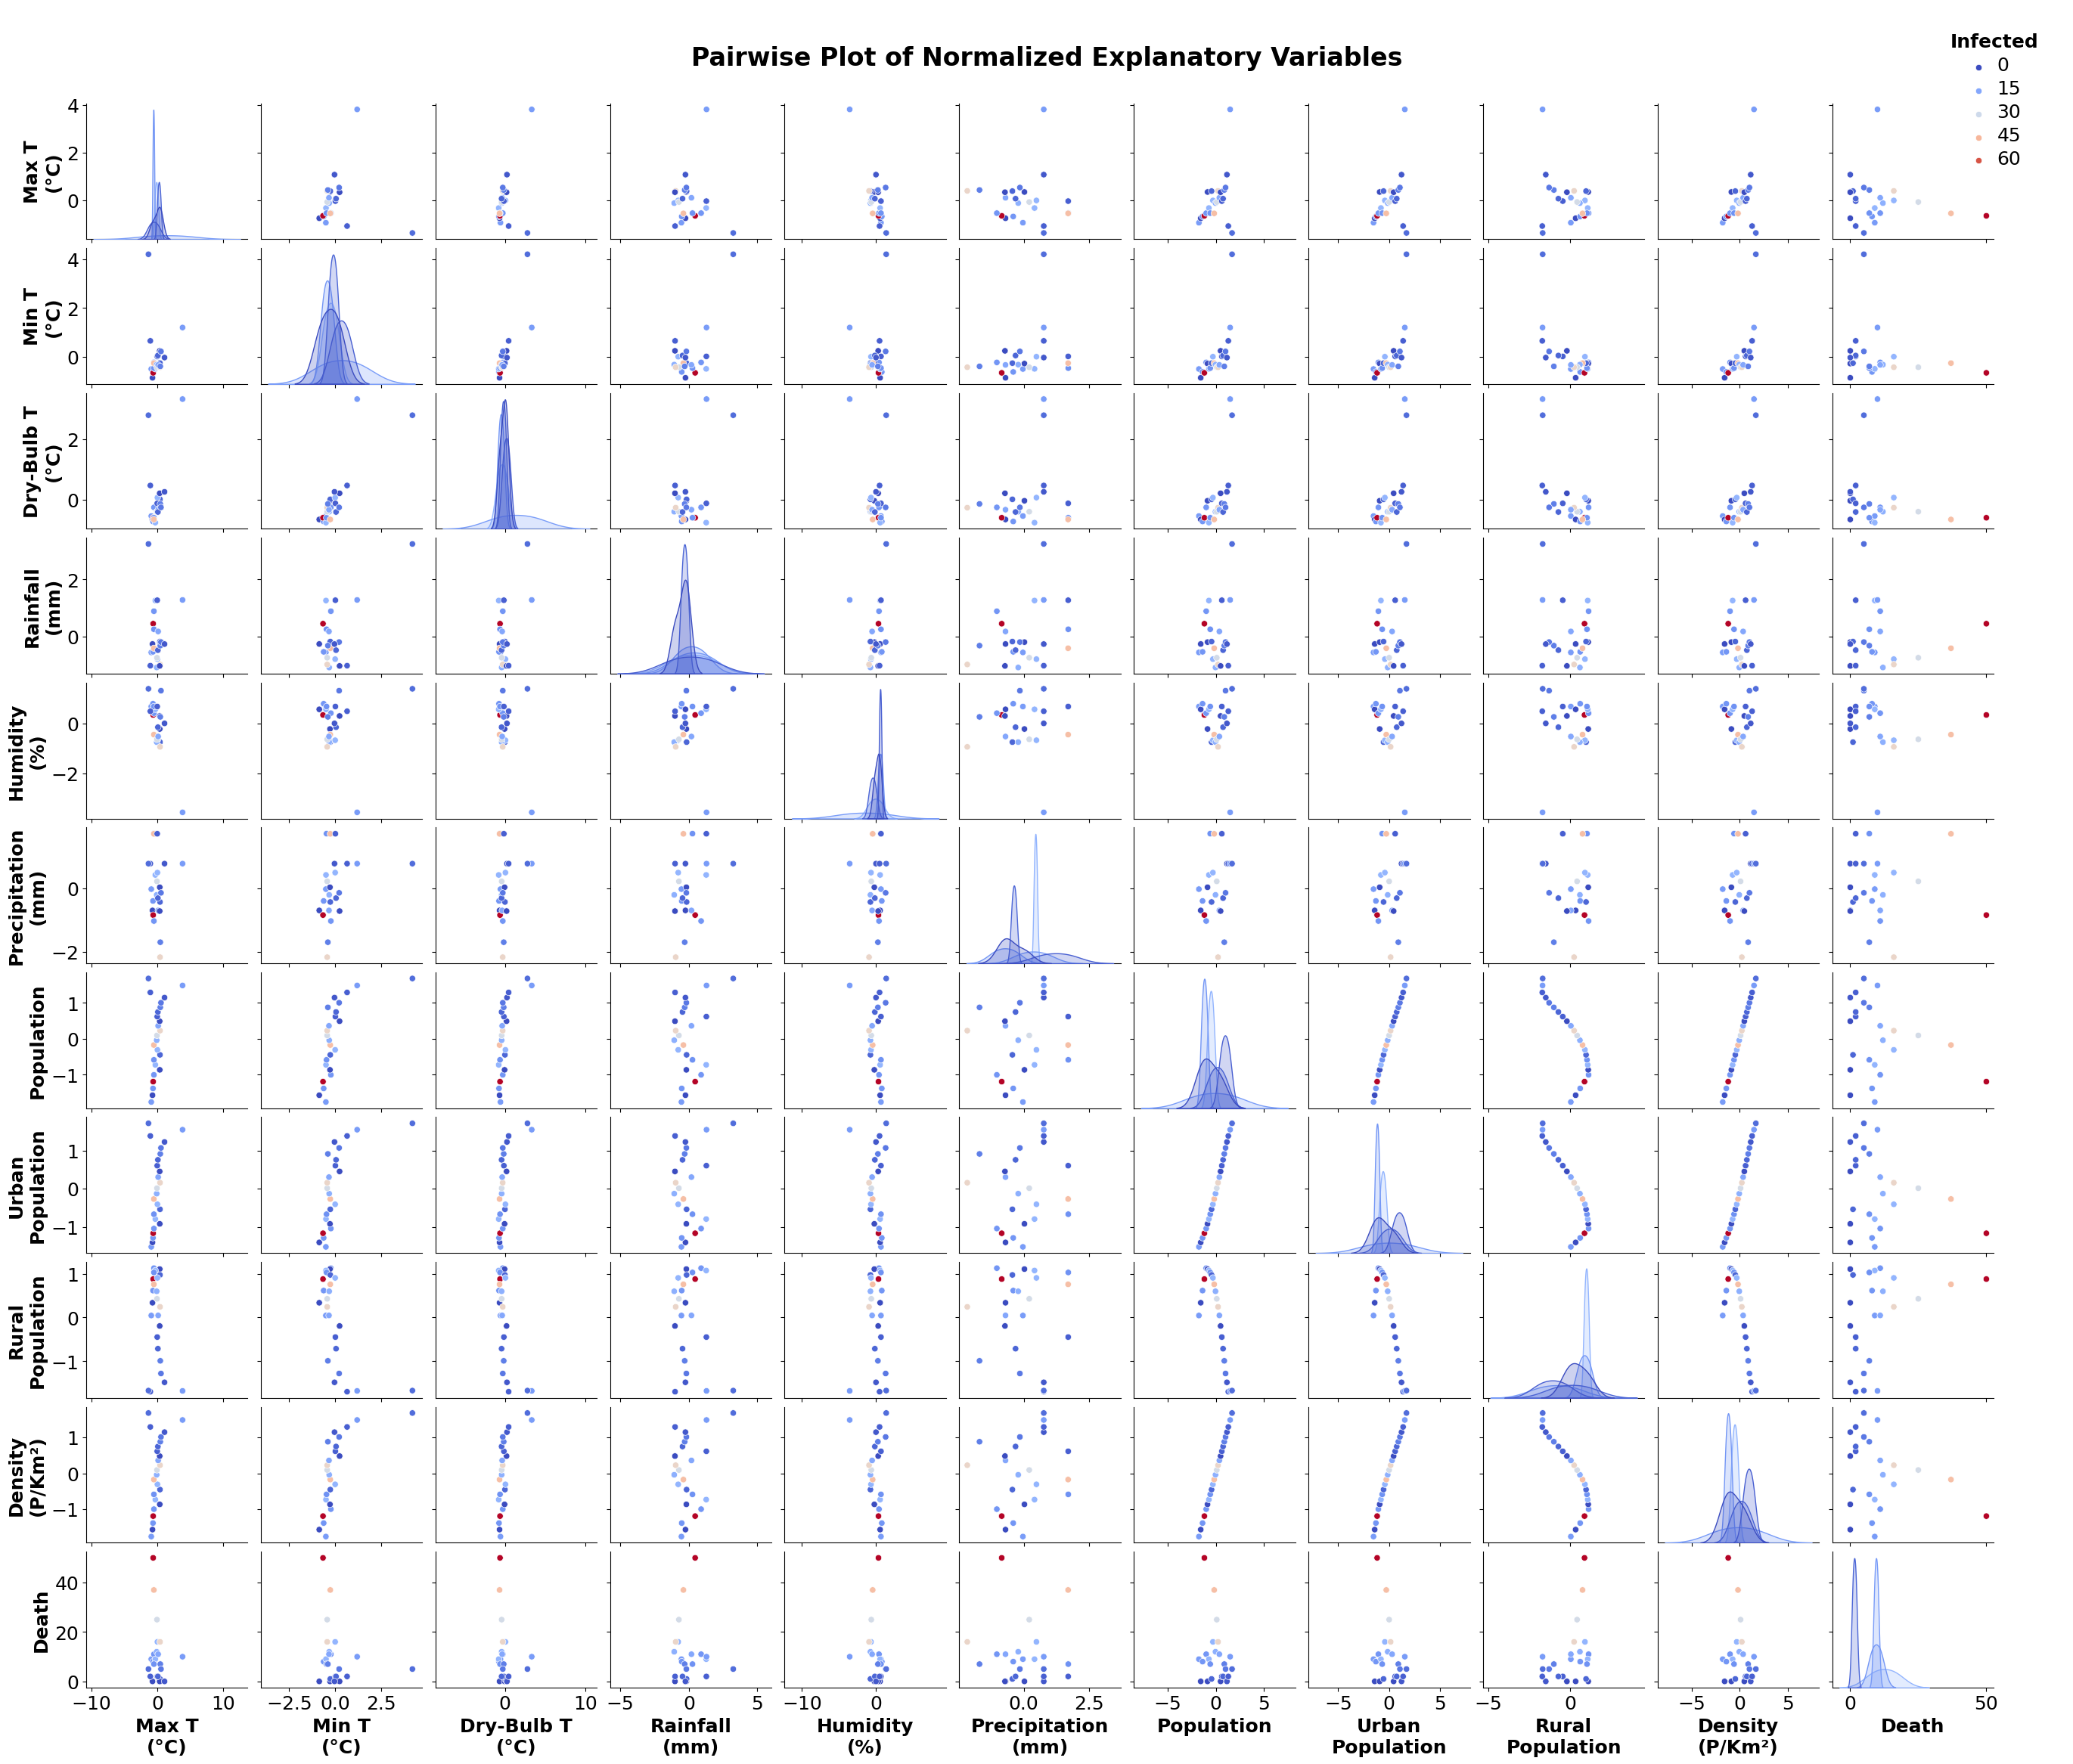

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the pairplot with larger figure size and customizations
pairplot = sns.pairplot(
    normalized_data, 
    hue='Infected', 
    kind='scatter', 
    diag_kind='kde', 
    palette='coolwarm', 
    height=2,  # Set each subplot size
    aspect=1.2  # Adjust aspect ratio for clarity
)

# Define a dictionary to update axis labels
axis_label_map = {
    "Max T": "Max T\n(°C)",
    "Min T": "Min T\n(°C)",
    "Dry-Bulb T": "Dry-Bulb T\n(°C)",
    "Rainfall": "Rainfall\n(mm)",
    "Humidity": "Humidity\n(%)",
    "Precipitation": "Precipitation\n(mm)",
    "Rural Population": "Rural\nPopulation",
    "Urban Population": "Urban\nPopulation",
    "Density (P/Km²)": "Density\n(P/Km²)",
}

# Update axis labels in the pairplot
for ax in pairplot.axes.flatten():
    if ax:  # Check if axis exists
        x_label = ax.get_xlabel()
        y_label = ax.get_ylabel()
        # Update x-axis label if in the map
        if x_label in axis_label_map:
            ax.set_xlabel(axis_label_map[x_label])
        # Update y-axis label if in the map
        if y_label in axis_label_map:
            ax.set_ylabel(axis_label_map[y_label])

# Adjust labels and titles for better visibility
for ax in pairplot.axes.flatten():
    if ax:  # Check if axis exists
        ax.set_xlabel(ax.get_xlabel(), fontsize=18, fontweight='bold')
        ax.set_ylabel(ax.get_ylabel(), fontsize=18, fontweight='bold')
        ax.tick_params(axis='both', labelsize=18)  # Increase tick label size

# Make the legend larger
pairplot._legend.set_title("Infected", prop={'size': 18, 'weight': 'bold'})
pairplot._legend.set_bbox_to_anchor((1, 1))
pairplot.legend.set_loc('right')
for text in pairplot._legend.texts:
    text.set_fontsize(18)  # Increase legend font size

# Add a main title
pairplot.fig.suptitle('Pairwise Plot of Normalized Explanatory Variables', 
                      fontsize=24, fontweight='bold', y=1.02)

# Save the plot as PNG for PDF
pairplot.savefig('imagesFinal/pairplot.png', dpi=220, format='png', bbox_inches='tight')

# Save the plot as EPS for LaTeX
pairplot.savefig('imagesFinal/pairplot.eps', dpi=220, format='eps', bbox_inches='tight')

plt.show()


# Fig 6 Heatmap of Correlation Matrix

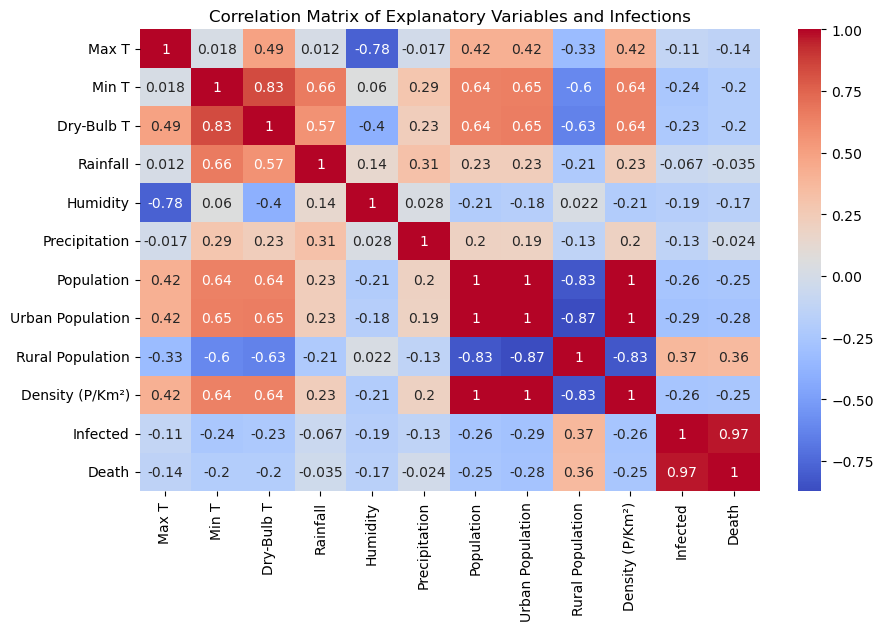

In [14]:
# Step 1: Calculate the correlation matrix
correlation_matrix = normalized_data.corr()

# Step 2: Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Explanatory Variables and Infections")

# Save the plot as PNG for PDF
plt.savefig('imagesFinal/correlation_matrix.png', dpi=220, format='png', bbox_inches='tight')

# Save the plot as EPS for LaTeX
plt.savefig('imagesFinal/correlation_matrix.eps', dpi=220, format="eps", bbox_inches="tight")

# Display the plot
plt.show()

# Fig 7 Global Perspective of NiV Infections and Deaths (2001 - 2024)

In [17]:
import pandas as pd

# Data for Nipah virus cases and deaths
data = {
    "country": ["Malaysia", "Singapore", "Bangladesh", "India", "Philippines"],
    "cases": [283, 11, 343, 91, 17],
    "deaths": [109, 1, 245, 63, 9]
}
df = pd.DataFrame(data)

# Display the dataframe
df.set_index('country')

,cases,deaths
country,,
Malaysia,283,109
Singapore,11,1
Bangladesh,343,245
India,91,63
Philippines,17,9


In [16]:
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# # Load the world map shapefile and handle multi-part geometries
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).explode(index_parts=True).reset_index(drop=True)

# # Filter the map to focus on Southeast Asia countries affected by NiV
# countries_of_interest = ["Malaysia", "Singapore", "Bangladesh", "India", "Philippines"]
# southeast_asia = world[world['name'].isin(countries_of_interest)]

# # Merge data with geometry
# southeast_asia = southeast_asia.merge(df, left_on="name", right_on="country")

# # Create side-by-side plots for cases and deaths
# fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# # Plot for Nipah Virus Cases
# southeast_asia.plot(
#     column='cases', 
#     cmap='Reds', 
#     linewidth=0.8, 
#     ax=ax[0], 
#     edgecolor='0.8', 
#     legend=True,
#     legend_kwds={'label': "Cases", 'orientation': "horizontal"}
# )
# ax[0].set_title("Nipah Virus Cases in Southeast Asia (1998-2024)")
# ax[0].axis('off')

# # Draw a border around the first subplot
# rect1 = patches.Rectangle((0, 0), 1, 1, transform=ax[0].transAxes, 
#                           fc="none", ec="black", lw=2)
# ax[0].add_patch(rect1)

# # Plot for Nipah Virus Deaths
# southeast_asia.plot(
#     column='deaths', 
#     cmap='Purples', 
#     linewidth=0.8, 
#     ax=ax[1], 
#     edgecolor='0.8', 
#     legend=True,
#     legend_kwds={'label': "Deaths", 'orientation': "horizontal"}
# )
# ax[1].set_title("Nipah Virus Deaths in Southeast Asia (1998-2024)")
# ax[1].axis('off')

# # Draw a border around the second subplot
# rect2 = patches.Rectangle((0, 0), 1, 1, transform=ax[1].transAxes, 
#                           fc="none", ec="black", lw=2)
# ax[1].add_patch(rect2)

# # Add a main title for the whole figure
# plt.suptitle("Nipah Virus Outbreaks in Southeast Asia (1998-2024)", fontsize=14)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title better

# # Save the plot as a EPS file with high resolution
# plt.savefig("imagesFinal/nipah_virus_outbreaks.eps", dpi=300)

# # Save the plot as a PNG file with high resolution
# plt.savefig("imagesFinal/nipah_virus_outbreaks.png", dpi=300)

# # Display the plot
# plt.show()